In [1]:
# act with TD(0) on mock mdp
# show state values

In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

from utils import MDPEnv, ReturnTracker, TDZeroPrediction

%config InlineBackend.figure_formats = ['svg']

In [3]:
true_values = {'gamma_0.7': np.array([0.38648556, 3.00052289, 0.60733446]),
               'gamma_0.9': np.array([1.82791928, 4.856684,   2.09872213]),
               'gamma_0.99': np.array([22.15073846, 25.41031266, 22.4490649 ])}

lr_gammas = [(0.1, 0.9), (0.01, 0.9), (0.001, 0.9)]

In [4]:
values = {}
max_steps = 10

for lr, gamma in lr_gammas:
    print('Learning with lr {} gamma {} ...'.format(lr, gamma))
    env = MDPEnv()
    agent = TDZeroPrediction(env, lr=lr, gamma=gamma)
    values['lr_{}_gamma_{}'.format(lr, gamma)] = np.zeros((100,3))
    for i,episodes in enumerate(max_steps*np.ones(100, dtype=int)):
        agent.learn(episodes=episodes, max_steps=100, verb=False)
        values['lr_{}_gamma_{}'.format(lr, gamma)][i,:] = agent.state_values
    

Learning with lr 0.1 gamma 0.9 ...
Learning with lr 0.01 gamma 0.9 ...
Learning with lr 0.001 gamma 0.9 ...


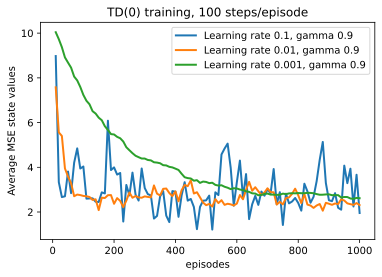

In [5]:
for lr, gamma in lr_gammas:
    mse = np.mean((values['lr_{}_gamma_{}'.format(lr, gamma)] - true_values['gamma_{}'.format(gamma)].reshape(1,-1))**2, axis=-1)
    plt.plot(np.arange(max_steps,1001,max_steps), mse, label='Learning rate {}, gamma {}'.format(lr, gamma), linewidth=2)
plt.ylabel('Average MSE state values')
plt.xlabel('episodes')
plt.legend()
plt.title('TD(0) training, 100 steps/episode')
plt.show()